In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
#read the file into data frame

housing = pd.read_csv('Housing.csv')

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
len(housing)

545

In [5]:
def binary_map(x):
    if x == 'yes':
        return 1
    else:
        return 0
    
    
housing['mainroad'] = housing['mainroad'].apply(binary_map)
housing['guestroom'] = housing['guestroom'].apply(binary_map)
housing['basement'] = housing['basement'].apply(binary_map)
housing['hotwaterheating'] = housing['hotwaterheating'].apply(binary_map)
housing['airconditioning'] = housing['airconditioning'].apply(binary_map)
housing['prefarea'] = housing['prefarea'].apply(binary_map)

In [6]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
status = pd.get_dummies(housing['furnishingstatus'],drop_first= True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [8]:
housing = pd.concat([housing,status], axis= 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [9]:
housing = housing.drop(['furnishingstatus'],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [11]:
df_train,df_test = train_test_split(housing,train_size = 0.7, test_size = 0.3, random_state = 100)

scaler = MinMaxScaler()

num_vars = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [12]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0


In [13]:
X_train = df_train
y_train = df_train.pop('price')

X_test = df_test
y_test = df_test.pop('price')

# Using the Cross Val Score

In [14]:
lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, scoring= 'r2', cv = 5)
scores

array([0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])

In [15]:
# another way of doing the same thing would be to deine k fold

kfold = KFold(n_splits= 5, shuffle= True, random_state= 100)
scores = cross_val_score(lm,X_train, y_train, cv = kfold, scoring = 'r2')
scores

array([0.59930574, 0.71307628, 0.61325733, 0.62739077, 0.6212937 ])

###  Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called **grid search** cross-validation.


In [16]:
len(X_train.columns)

13

In [19]:
folds = KFold(n_splits=5, shuffle= True, random_state= 100)

hyper_params = [{'n_features_to_select': list(range(1,14))}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator= rfe, param_grid= hyper_params, scoring= 'r2', cv = folds, verbose= 1, 
                        return_train_score= True)

model_cv.fit(X_train,y_train)



Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [21]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025184,0.025903,0.001399,4.890060e-04,1,{'n_features_to_select': 1},0.172606,0.351721,0.206887,0.165910,...,0.243471,0.077611,13,0.302971,0.265961,0.280611,0.300768,0.269025,0.283867,0.015506
1,0.013392,0.003379,0.001400,4.907059e-04,2,{'n_features_to_select': 2},0.335665,0.428751,0.439969,0.505321,...,0.438090,0.058533,12,0.505799,0.489802,0.462091,0.474178,0.471907,0.480755,0.015355
2,0.012193,0.001326,0.001200,3.996849e-04,3,{'n_features_to_select': 3},0.421848,0.539257,0.491515,0.604426,...,0.516555,0.060021,11,0.568074,0.544917,0.542889,0.534685,0.542412,0.546596,0.011289
3,0.010593,0.000800,0.001000,1.907349e-07,4,{'n_features_to_select': 4},0.449487,0.567101,0.494461,0.600237,...,0.526070,0.053150,10,0.587523,0.564018,0.549490,0.541496,0.549291,0.558364,0.016296
4,0.009994,0.000894,0.001399,4.897458e-04,5,{'n_features_to_select': 5},0.494779,0.610200,0.492807,0.590812,...,0.541765,0.049251,8,0.620038,0.597033,0.584663,0.549413,0.589397,0.588109,0.022847
5,0.009394,0.000489,0.001199,3.995419e-04,6,{'n_features_to_select': 6},0.512477,0.628849,0.488411,0.527379,...,0.540988,0.047988,9,0.626959,0.603122,0.596348,0.606852,0.601063,0.606869,0.010602
6,0.007795,0.000400,0.001199,3.996372e-04,7,{'n_features_to_select': 7},0.568887,0.664093,0.552385,0.534634,...,0.577613,0.044949,7,0.658577,0.638501,0.630137,0.646285,0.638313,0.642363,0.009582
7,0.007196,0.000979,0.001399,4.900962e-04,8,{'n_features_to_select': 8},0.570639,0.665608,0.592323,0.550001,...,0.591740,0.039391,6,0.674146,0.640825,0.654028,0.658665,0.657277,0.656988,0.010651
8,0.006397,0.000489,0.001399,4.896290e-04,9,{'n_features_to_select': 9},0.578843,0.694189,0.606220,0.590777,...,0.615256,0.040756,4,0.676043,0.652605,0.659579,0.668996,0.664321,0.664309,0.007988
9,0.005596,0.000490,0.001399,4.901162e-04,10,{'n_features_to_select': 10},0.574376,0.693197,0.601972,0.594335,...,0.608457,0.043476,5,0.686032,0.661729,0.674558,0.678443,0.677153,0.675583,0.007910


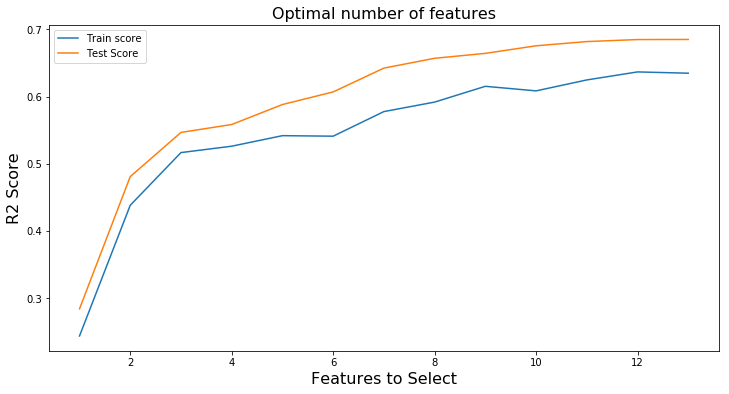

In [37]:
plt.figure(figsize = (12,6))

plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])

plt.xlabel('Features to Select', fontsize = 16)
plt.ylabel('R2 Score', fontsize = 16)
plt.title('Optimal number of features', fontsize = 16)
plt.legend(['Train score', 'Test Score'], loc = 'upper left')

## Now lets make the model with optimal number of features reported by gridsearchcv

In [28]:
lm = LinearRegression()

lm.fit(X_train,y_train)

rfe = RFE(lm, n_features_to_select= 10)

rfe = rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test)

y_pred

array([0.19727578, 0.38012894, 0.30592766, 0.27503118, 0.25967533,
       0.18808401, 0.49650309, 0.29590076, 0.14199359, 0.30475952,
       0.06750924, 0.3621991 , 0.21953064, 0.42049008, 0.34312262,
       0.35443302, 0.4952017 , 0.2004083 , 0.32794692, 0.277514  ,
       0.2303343 , 0.08657158, 0.22985458, 0.12900351, 0.1032991 ,
       0.15437384, 0.29502316, 0.35392881, 0.33942762, 0.24813802,
       0.09662703, 0.22611252, 0.10870652, 0.09082893, 0.25850505,
       0.2391026 , 0.21134719, 0.11791293, 0.09052041, 0.17468556,
       0.07154596, 0.2718828 , 0.31319624, 0.12515619, 0.09907732,
       0.21616041, 0.24657189, 0.20990976, 0.10464712, 0.36827254,
       0.02318061, 0.38264736, 0.36316652, 0.37856847, 0.39713981,
       0.23497082, 0.35231923, 0.09717783, 0.08840952, 0.19590309,
       0.11378987, 0.13733438, 0.42023413, 0.42738909, 0.13013803,
       0.11851123, 0.3795499 , 0.04899839, 0.05732926, 0.39147758,
       0.08792087, 0.35776328, 0.17563004, 0.15763138, 0.26948

In [33]:
from sklearn.metrics import r2_score,mean_squared_error

In [34]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.015114171891839128
0.5812051458999572


In [35]:
y_pred = lm.predict(X_test)

In [38]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.01445184009923833
0.5995575338728532


## In summary we can say that GridSearchCV is a good way to get the optimal parameters of a model to be used. And cross_val_score is a good way to compare the accuracy of different types of models.